In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
contri_value = np.load("/liujinxin/lam/lulu_ms/Result/Poisson/expr_1_11_subnet_9_msdnn_2nd_p_s_mu_15/contribution.npy",allow_pickle=True)

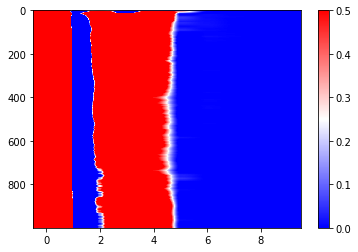

In [10]:
plt.imshow(contri_value, cmap='bwr', aspect='auto',vmin=0,vmax=0.5)
plt.colorbar()

归一化

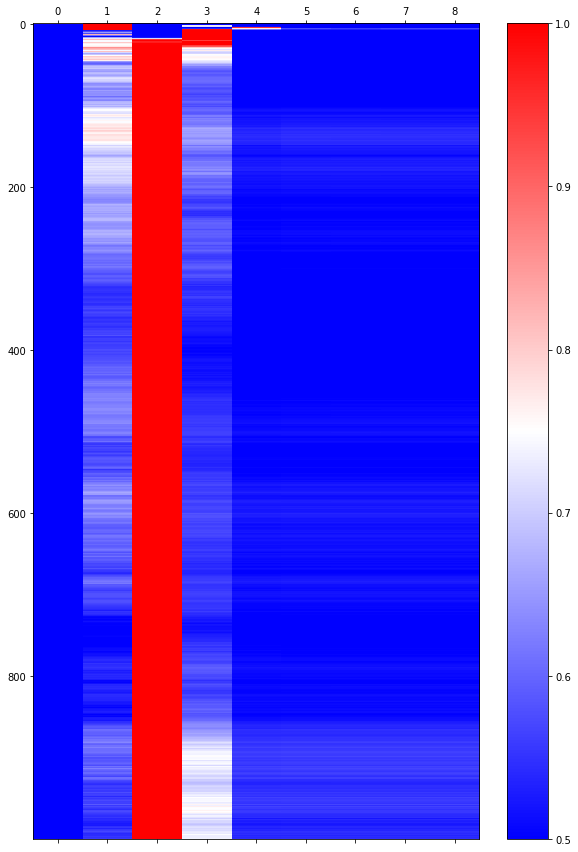

In [20]:
min_values = np.amin(contri_value[:,1:], axis=1, keepdims=True)
max_values = np.amax(contri_value[:,1:], axis=1, keepdims=True)
epsilon= 1e-10
range_values = max_values - min_values + epsilon  # 加上 epsilon 避免分母为零
contri_normalized = (contri_value[:,1:] - min_values) / range_values

fig, ax = plt.subplots(figsize=(10, 15))  # Create a figure and an axes with specified figsize
im = ax.matshow(contri_normalized, cmap='bwr', aspect='auto', vmin=0.5, vmax=1)  # Use imshow here instead of matshow

plt.colorbar(im, ax=ax)  # Add colorbar, associating with the created axes

